In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import xarray as xr


from xmitgcm import open_mdsdataset
import xmitgcm
import ecco_v4_py as ecco


from netCDF4 import Dataset

import seawater

import ../plotting_functions
import open_datasets

import derive_potential_density_values_TEST
import integrate_on_density_surfaces

from importlib import reload

# reload modules during prototyping...
plotting_functions = reload(plotting_functions)
open_datasets = reload(open_datasets)
derive_potential_density_values_TEST = reload(derive_potential_density_values_TEST)






In [2]:
data_dir = "./old_nctiles_monthly/"
uvvel_data_dir = "./nctiles_monthly/"

UVELMASS_var = "UVELMASS"
VVELMASS_var = "VVELMASS"
GM_PSIX_var = "GM_PsiX"
GM_PSIY_var = "GM_PsiY"


# RHOAnoma: insitu density anomaly
RHOAnoma_var_str = "RHOAnoma"
# PHIHYD: insitu pressure anomaly with respect to the depth integral of gravity and reference density (g*rho_reference)
PHIHYD_var_str = "PHIHYD"
# SALT: insitu salinity (psu)
SALT_var_str = "SALT"
# THETA: potential pressure (C)
THETA_var_str = "THETA"

In [3]:
time_slice = np.arange(60,72)
        

In [4]:
grid_path = "./ecco_grid/ECCOv4r3_grid.nc"
grid = xr.open_dataset(grid_path)

In [18]:
UVELMASS_ds_raw = open_datasets.open_combine_raw_ECCO_tile_files(uvvel_data_dir, UVELMASS_var, time_slice)
VVELMASS_ds_raw = open_datasets.open_combine_raw_ECCO_tile_files(uvvel_data_dir, VVELMASS_var, time_slice)
GM_PSIX_ds_raw = open_datasets.open_combine_raw_ECCO_tile_files(uvvel_data_dir, GM_PSIX_var, time_slice)
GM_PSIY_ds_raw = open_datasets.open_combine_raw_ECCO_tile_files(uvvel_data_dir, GM_PSIY_var, time_slice)

PHIHYD_ds_raw = open_datasets.open_combine_raw_ECCO_tile_files(data_dir, PHIHYD_var_str, time_slice)
SALT_ds_raw = open_datasets.open_combine_raw_ECCO_tile_files(data_dir, SALT_var_str, time_slice)
THETA_ds_raw = open_datasets.open_combine_raw_ECCO_tile_files(data_dir, THETA_var_str, time_slice)



Loaded UVELMASS over time slice  

Loaded VVELMASS over time slice  

Loaded GM_PsiX over time slice  

Loaded GM_PsiY over time slice  

Loaded PHIHYD over time slice  

Loaded SALT over time slice  

Loaded THETA over time slice  



In [6]:
# set indecies starting from zero..

UVELMASS_ds_raw = UVELMASS_ds_raw.assign_coords(i_g=np.arange(0,90),j=np.arange(0,90),k=np.arange(0,50))
VVELMASS_ds_raw = VVELMASS_ds_raw.assign_coords(i=np.arange(0,90),j_g=np.arange(0,90),k=np.arange(0,50))

In [7]:
maskW = (UVELMASS_ds_raw.UVELMASS.isel(k=0,time=1)*0 + 1.)
maskS = (VVELMASS_ds_raw.VVELMASS.isel(k=0,time=1)*0 + 1.)


In [8]:
PHIHYD_ds_raw = PHIHYD_ds_raw.assign_coords(i=np.arange(0,90),j=np.arange(0,90),k=np.arange(0,50))
SALT_ds_raw = SALT_ds_raw.assign_coords(i=np.arange(0,90),j=np.arange(0,90),k=np.arange(0,50))
THETA_ds_raw = THETA_ds_raw.assign_coords(i=np.arange(0,90),j=np.arange(0,90),k=np.arange(0,50))

In [9]:
derive_potential_density_values_TEST = reload(derive_potential_density_values_TEST)

PDENS_ds, P_INSITY_ds = derive_potential_density_values_TEST.make_potential_density_dataset(PHIHYD_ds_raw, 
                                                                                            SALT_ds_raw, 
                                                                                            THETA_ds_raw, 
                                                                                            time_slice, 
                                                                                            ref_pressure=2000.)




Max insitu pressure:  <xarray.DataArray 'P_INSITU' ()>
array(6032.5071929626465) decibars
Min insitu pressure:  <xarray.DataArray 'P_INSITU' ()>
array(4.676130050439834) decibars
Mean insitu pressure:  <xarray.DataArray 'P_INSITU' ()>
array(948.6081536845475) decibars
TEMP_INSITU_ds.max():  <xarray.Dataset>
Dimensions:      ()
Data variables:
    TEMP_INSITU  float64 34.38
    timstep      float64 2.629e+04
    land         float64 1.0
    area         float64 1.19e+10
    thic         float64 456.5 degrees C
TEMP_INSITU_ds.min():  <xarray.Dataset>
Dimensions:      ()
Data variables:
    TEMP_INSITU  float64 -2.064
    timstep      float64 2.262e+04
    land         float64 1.0
    area         float64 1.742e+05
    thic         float64 10.0 degrees C
insitu_potential_density.max():  nan  decibars
insitu_potential_density.min():  nan  decibars


In [10]:
PDENS_ds = PDENS_ds.assign_coords(i=np.arange(0,90),j=np.arange(0,90),k=np.arange(0,50))


In [11]:
mexico_mask_W, mexico_mask_S = ecco.get_basin_mask("mexico",maskW), ecco.get_basin_mask("mexico",maskS)
baffin_mask_W, baffin_mask_S = ecco.get_basin_mask("baffin",maskW), ecco.get_basin_mask("baffin",maskS)
north_mask_W, north_mask_S = ecco.get_basin_mask("north",maskW), ecco.get_basin_mask("north",maskS)
hudson_mask_W, hudson_mask_S = ecco.get_basin_mask("hudson",maskW), ecco.get_basin_mask("hudson",maskS)
gin_mask_W, gin_mask_S = ecco.get_basin_mask("gin",maskW), ecco.get_basin_mask("gin",maskS)
atl_mask_W, atl_mask_S = ecco.get_basin_mask("atl",maskW), ecco.get_basin_mask("atl",maskS)

full_atl_basin_mask_W = atl_mask_W + baffin_mask_W + north_mask_W + gin_mask_W + mexico_mask_W + hudson_mask_W
full_atl_basin_mask_S = atl_mask_S + baffin_mask_S + north_mask_S + gin_mask_S + mexico_mask_S + hudson_mask_S


ind_mask_W, ind_mask_S = ecco.get_basin_mask("ind",maskW), ecco.get_basin_mask("ind",maskS)
pac_mask_W, pac_mask_S = ecco.get_basin_mask("pac",maskW), ecco.get_basin_mask("pac",maskS)
southChina_mask_W, southChina_mask_S = ecco.get_basin_mask("southChina",maskW), ecco.get_basin_mask("southChina",maskS)
japan_W, japan_S = ecco.get_basin_mask("japan",maskW), ecco.get_basin_mask("japan",maskS)
eastChina_W, eastChina_S = ecco.get_basin_mask("eastChina",maskW), ecco.get_basin_mask("eastChina",maskS)
timor_W, timor_S = ecco.get_basin_mask("timor",maskW), ecco.get_basin_mask("timor",maskS)
java_W, java_S = ecco.get_basin_mask("java",maskW), ecco.get_basin_mask("java",maskS)
bering_mask_W, bering_mask_S = ecco.get_basin_mask("bering",maskW), ecco.get_basin_mask("bering",maskS)
okhotsk_mask_W, okhotsk_mask_S = ecco.get_basin_mask("okhotsk",maskW), ecco.get_basin_mask("okhotsk",maskS)

full_indpac_basin_mask_W = (ind_mask_W + pac_mask_W + southChina_mask_W + japan_W + eastChina_W 
                            + timor_W + java_W + okhotsk_mask_W + bering_mask_W)
full_indpac_basin_mask_S = (ind_mask_S + pac_mask_S + southChina_mask_S + japan_S + eastChina_S 
                            + timor_S + java_S + okhotsk_mask_S + bering_mask_S)

j_transport_coords = np.arange(0,90)
i_transport_coords = np.arange(0,90)
# WATCH OUT FOR THIS INDEXING!
tile_coords = np.arange(0,13)

southern_ocean_mask_C = (PDENS_ds.PDENS.where(PDENS_ds["lat"] < -32)*0 + 1.)
southern_ocean_mask_C = southern_ocean_mask_C.isel(time=0,k=0)
southern_ocean_mask_C = southern_ocean_mask_C.assign_coords(j=j_transport_coords,
                                                            i=i_transport_coords,
                                                            tile=tile_coords)

southern_ocean_mask_W = southern_ocean_mask_C.rename({"i":"i_g"}).drop("lon").drop("lat")
southern_ocean_mask_S = southern_ocean_mask_C.rename({"j":"j_g"}).drop("lon").drop("lat")



so_atl_basin_mask_W = full_atl_basin_mask_W + southern_ocean_mask_W.where(southern_ocean_mask_W==1, other=0) 
so_atl_basin_mask_S = full_atl_basin_mask_S + southern_ocean_mask_S.where(southern_ocean_mask_S==1, other=0)
so_atl_basin_mask_W = so_atl_basin_mask_W.where(so_atl_basin_mask_W > 0, other=np.nan)*0 + 1
so_atl_basin_mask_S = so_atl_basin_mask_S.where(so_atl_basin_mask_S > 0, other=np.nan)*0 + 1


so_indpac_basin_mask_W = full_indpac_basin_mask_W.where(full_indpac_basin_mask_W==1,other=0) + southern_ocean_mask_W.where(southern_ocean_mask_W==1,other=0) 
so_indpac_basin_mask_S = full_indpac_basin_mask_S.where(full_indpac_basin_mask_S==1,other=0) + southern_ocean_mask_S.where(southern_ocean_mask_S==1,other=0)
so_indpac_basin_mask_W = so_indpac_basin_mask_W.where(so_indpac_basin_mask_W != 0, other=np.nan)*0 + 1
so_indpac_basin_mask_S = so_indpac_basin_mask_S.where(so_indpac_basin_mask_S != 0, other=np.nan)*0 + 1


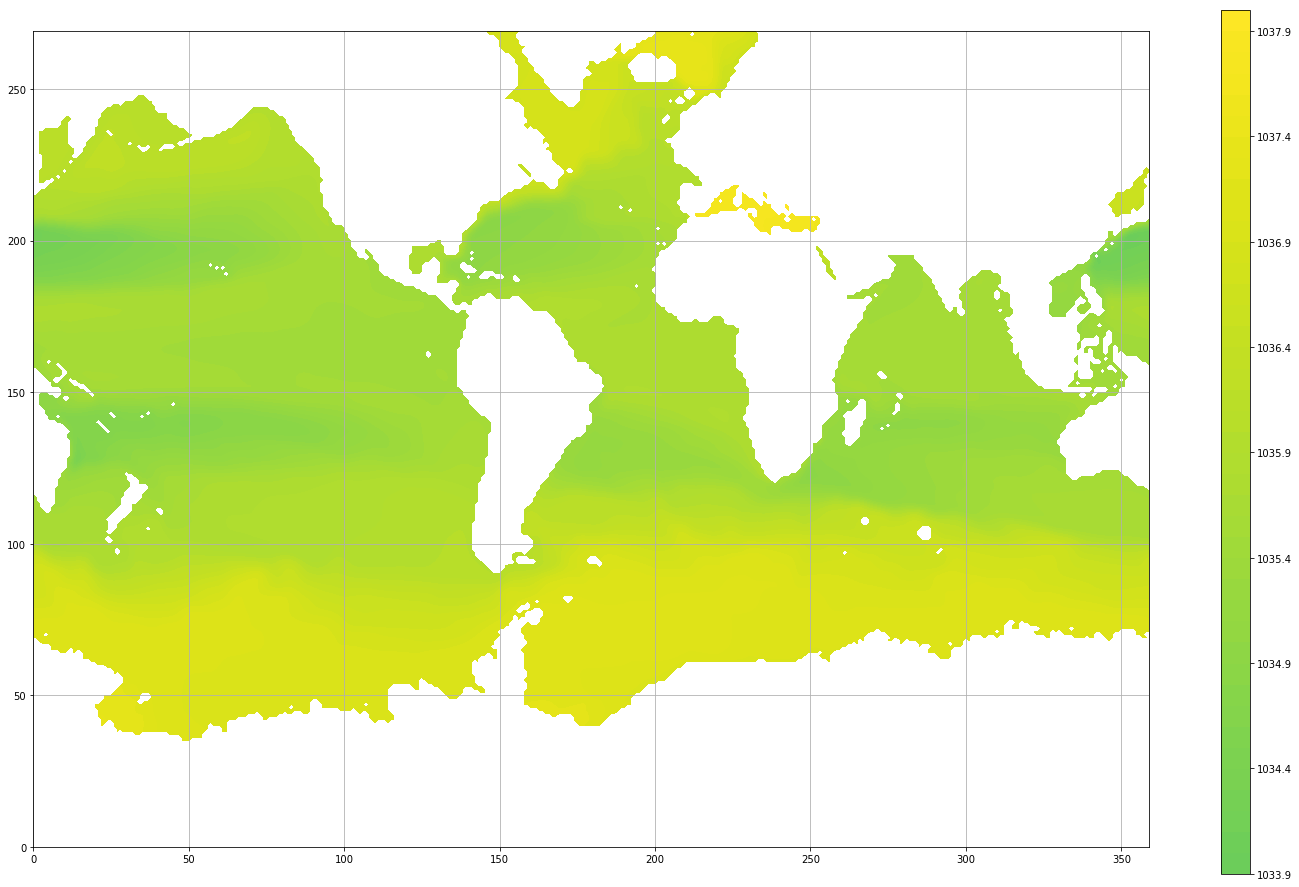

In [12]:
integrate_on_density_surfaces = reload(integrate_on_density_surfaces)
PDENS_ds_world = integrate_on_density_surfaces.stitch_tiles(PDENS_ds.PDENS)

fig = plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(nrows=1,ncols=1,hspace=0.02,wspace=0.05)
ax = fig.add_subplot(gs[0])

im = ax.contourf(PDENS_ds_world.isel(time=1,k=20),40,vmin=1020.)
ax.grid()
cb_ax = fig.add_axes([.95, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im,cax=cb_ax)

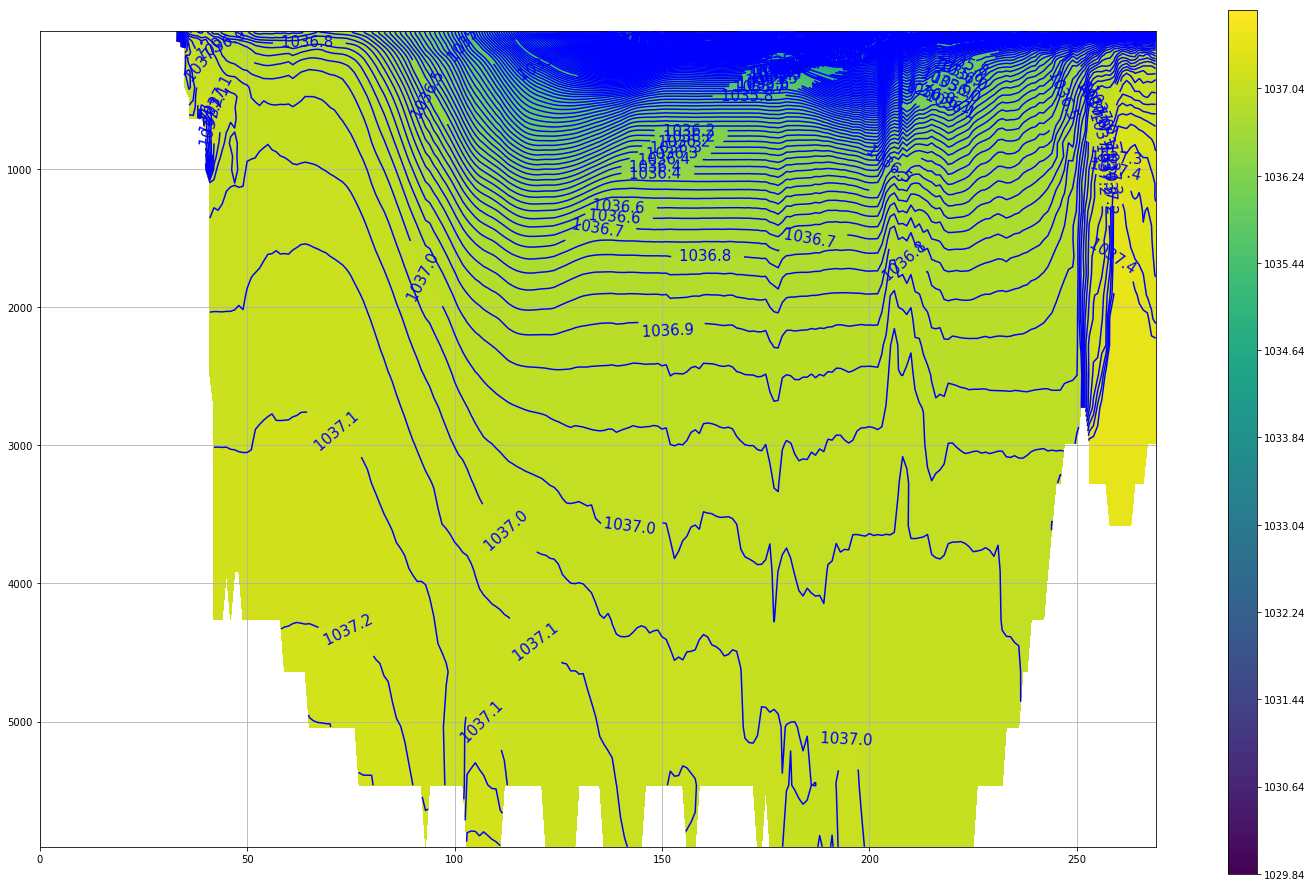

In [13]:
fig = plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(nrows=1,ncols=1,hspace=0.02,wspace=0.05)
ax = fig.add_subplot(gs[0])

class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s

vertical_levels = PDENS_ds.dep
#vertical_levels = np.arange(0,50)

PDENS_ds_world_time_mean = PDENS_ds_world.mean(dim="time")
PDENS_ds_world_time_zonal_mean = PDENS_ds_world_time_mean.mean(dim="y")
im = ax.contourf(np.arange(0,270),vertical_levels,PDENS_ds_world_time_zonal_mean.T,200)
im2 = ax.contour(np.arange(0,270),vertical_levels,PDENS_ds_world_time_zonal_mean.T,200,colors=('b'))
ax.levels = [nf(val) for val in im.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%0.6r'
else:
    fmt = '%0.6r '
    

ax.clabel(im2, im2.levels, inline=True,fmt=fmt, fontsize=15)

ax.grid()
ax.invert_yaxis()
cb_ax = fig.add_axes([.95, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im,cax=cb_ax)

In [14]:
cds = grid.coords.to_dataset()
grid_xmitgcm = ecco.ecco_utils.get_llc_grid(cds)

In [15]:
transport_x = (UVELMASS_ds_raw["UVELMASS"] * grid["drF"] * grid["dyG"])*so_indpac_basin_mask_W
transport_y = (VVELMASS_ds_raw["VVELMASS"] * grid["drF"] * grid["dxG"])*so_indpac_basin_mask_S


# create infrastructure for integrating in depth space

lat_vals = np.arange(-88,88)

# create an empty array with a stretched depth dimension
# Set the coordinates of the stretched depth dimension to potential density values..
# add padding to either end of the pot. density coordinates
# just trying with slightly coarser resolution 
#(what pot density resolution is valid in this case?)
pot_dens_coord = np.arange(1032,1035,0.2)

pot_dens_coord = np.concatenate((np.asarray([1000.]),pot_dens_coord, np.arange(1035.1,1038,0.1)))

# set dimensions based on input dataset with modified vertical level spacing..
pot_dens_dims = (len(time_slice),
                 len(pot_dens_coord),
                 len(lat_vals))

empty_pot_coords_data = np.zeros(pot_dens_dims)
# trying to make this as general as possible, but need to keep an eye on this..
new_coords = [time_slice+1, pot_dens_coord, lat_vals]
new_dims = ["time", "pot_rho", "lat"]



depth_array = PDENS_ds.PDENS.copy(deep=True)


depth_array_x = depth_array.rename({"i":"i_g"})*so_indpac_basin_mask_W
depth_array_y = depth_array.rename({"j":"j_g"})*so_indpac_basin_mask_S

depth_integrated_pdens_transport = xr.DataArray(data=empty_pot_coords_data,coords=new_coords,dims=new_dims)
depth_integrated_pdens_transport.load()
depth_integrated_pdens_transport_latx = depth_integrated_pdens_transport.copy(deep=True)
depth_integrated_pdens_transport_latx.load()
depth_integrated_pdens_transport_laty = depth_integrated_pdens_transport.copy(deep=True)
depth_integrated_pdens_transport_laty.load()


for density in pot_dens_coord:
    print("Started " + str(density) + " surface") 
    potdens_stencil_x = depth_array_x > density
    potdens_stencil_y = depth_array_y > density  
    
    
    depth_integrated_trsp_x = transport_x*potdens_stencil_x
    depth_integrated_trsp_x.load()
    depth_integrated_trsp_x = depth_integrated_trsp_x.sum(dim='k')
    
    depth_integrated_trsp_y = transport_y*potdens_stencil_y
    depth_integrated_trsp_y.load()
    depth_integrated_trsp_y = depth_integrated_trsp_y.sum(dim='k')

    print('starting lat-band filtering')
    for lat in lat_vals:
        # Compute mask for particular latitude band
        print(str(lat)+' ',end='')
        lat_maskW, lat_maskS = ecco.vector_calc.get_latitude_masks(lat, cds['YC'], grid_xmitgcm)
       
        # Sum horizontally
        lat_trsp_x = (depth_integrated_trsp_x * lat_maskW).sum(dim=['i_g','j','tile'],skipna=True)
        lat_trsp_y = (depth_integrated_trsp_y * lat_maskS).sum(dim=['i','j_g','tile'],skipna=True)
        depth_integrated_pdens_transport_latx.loc[{'lat':lat,'pot_rho':density}] = lat_trsp_x
        depth_integrated_pdens_transport_laty.loc[{'lat':lat,'pot_rho':density}] = lat_trsp_y
        depth_integrated_pdens_transport.loc[{'lat':lat,'pot_rho':density}] = lat_trsp_y + lat_trsp_x
        #depth_integrated_pdens_lat_dict[str(lat)] = lat_trsp_x + lat_trsp_y
    print("\n")
    
    
#depth_integrated_pdens.to_netcdf("./depth_integrated_pdens_TEST11.nc")

Started 1000.0 surface
starting lat-band filtering
-88 -87 -86 -85 -84 -83 -82 -81 -80 -79 -78 -77 -76 -75 -74 -73 -72 -71 -70 -69 -68 -67 -66 -65 -64 -63 -62 -61 -60 -59 -58 -57 -56 -55 -54 -53 -52 -51 -50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 

Started 1032.0 surface
starting lat-band filtering
-88 -87 -86 -85 -84 -83 -82 -81 -80 -79 -78 -77 -76 -75 -74 -73 -72 -71 -70 -69 -68 -67 -66 -65 -64 -63 -62 -61 -60 -59 -58 -57 -56 -55 -54 -53 -52 -51 -50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14

-88 -87 -86 -85 -84 -83 -82 -81 -80 -79 -78 -77 -76 -75 -74 -73 -72 -71 -70 -69 -68 -67 -66 -65 -64 -63 -62 -61 -60 -59 -58 -57 -56 -55 -54 -53 -52 -51 -50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 

Started 1036.0 surface
starting lat-band filtering
-88 -87 -86 -85 -84 -83 -82 -81 -80 -79 -78 -77 -76 -75 -74 -73 -72 -71 -70 -69 -68 -67 -66 -65 -64 -63 -62 -61 -60 -59 -58 -57 -56 -55 -54 -53 -52 -51 -50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3

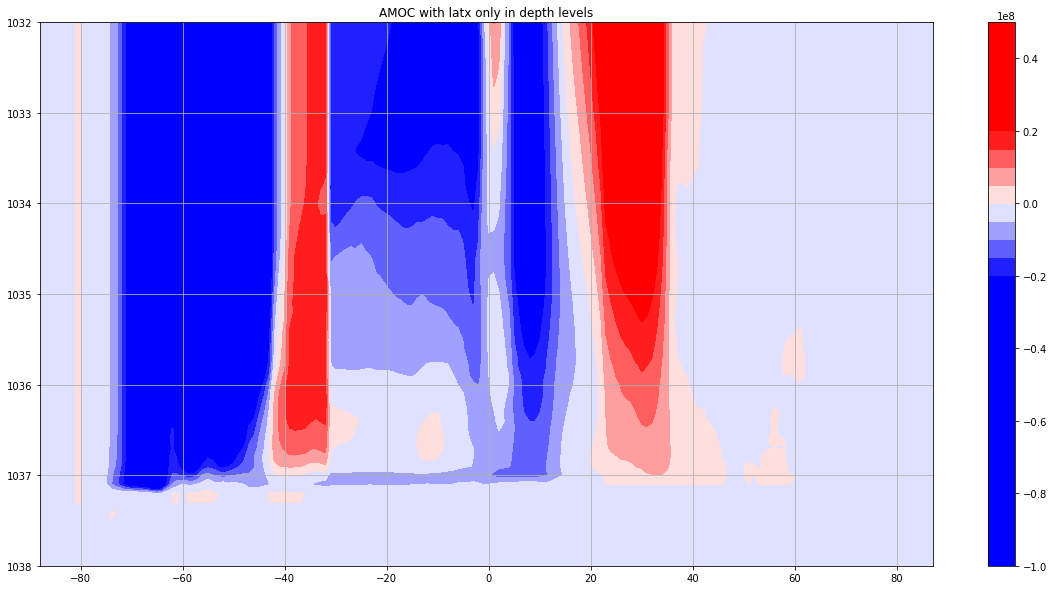

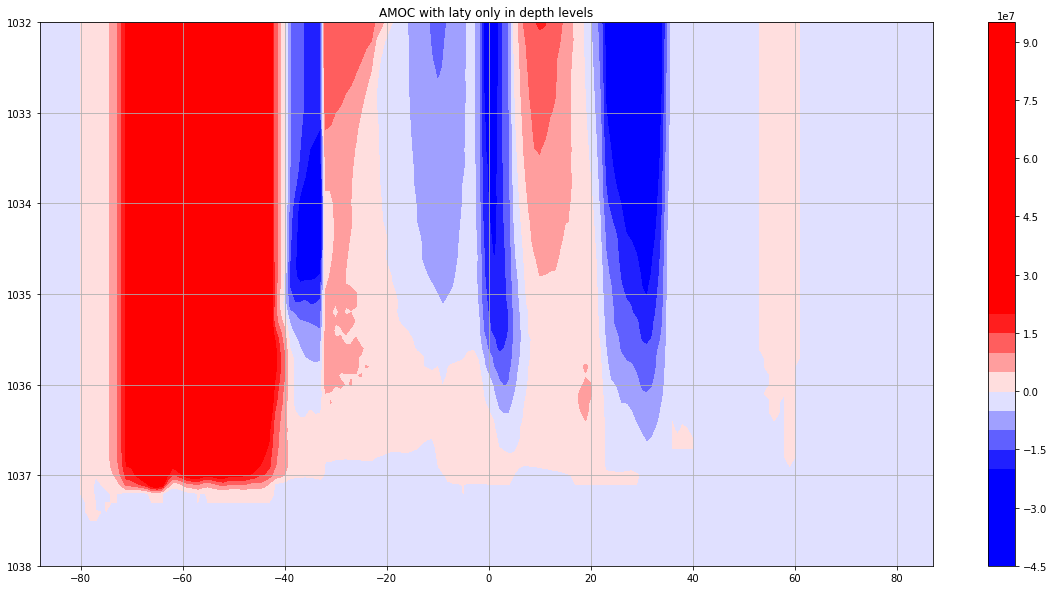

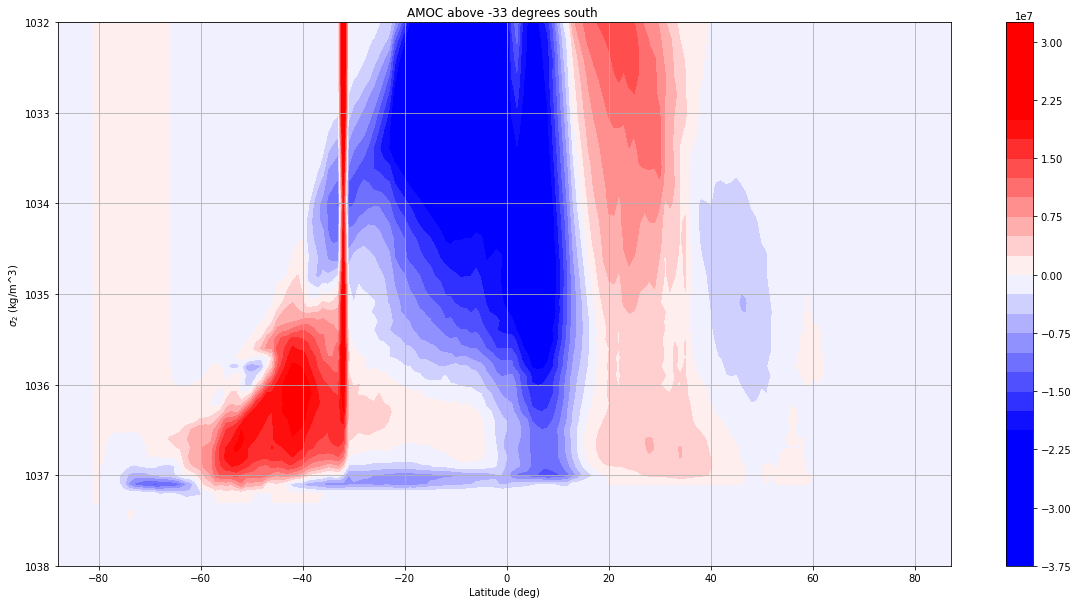

In [16]:


#depth_integrated_pdens_transport_copy = depth_integrated_pdens_transport.where(depth_integrated_pdens_transport 
# < surface_pdens).copy(deep=True)
#depth_integrated_pdens_transport_negative_latmaskS = depth_integrated_pdens_transport.copy(deep=True)
min_lat = 0
max_lat = 178
d_levels = np.arange(0,50)

pvmin = -2e7
pvmax = 2e7

plt.figure(figsize=(20,10))
#vmin = depth_integrated_pdens_transport.min()
#vmax = depth_integrated_pdens_transport.max()
plt.contourf(depth_integrated_pdens_transport_latx.lat[min_lat:max_lat],
             pot_dens_coord[1:],
             -1*depth_integrated_pdens_transport_latx.mean(dim='time')[1:,min_lat:max_lat],30,
             cmap='bwr',
            vmin=pvmin,
            vmax=pvmax)
plt.colorbar()
plt.title("AMOC with latx only in depth levels")
plt.grid()
plt.gca().invert_yaxis()
plt.show()
plt.close()

plt.figure(figsize=(20,10))
#vmin = depth_integrated_pdens_transport.min()
#vmax = depth_integrated_pdens_transport.max()
plt.contourf(depth_integrated_pdens_transport_laty.lat[min_lat:max_lat],
             pot_dens_coord[1:],
             -1*depth_integrated_pdens_transport_laty.mean(dim='time')[1:,min_lat:max_lat],30,
             cmap='bwr',
            vmin=pvmin,
            vmax=pvmax)
plt.colorbar()
plt.title("AMOC with laty only in depth levels")
plt.grid()
plt.gca().invert_yaxis()
plt.show()
plt.close()

plt.figure(figsize=(20,10))
#vmin = depth_integrated_pdens_transport.min()
#vmax = depth_integrated_pdens_transport.max()
plt.contourf(depth_integrated_pdens_transport_latx.lat[min_lat:max_lat],
             pot_dens_coord[1:],
             -1*depth_integrated_pdens_transport_latx.mean(dim='time')[1:,min_lat:max_lat]-1*depth_integrated_pdens_transport_laty.mean(dim='time')[1:,min_lat:max_lat],30,
             cmap='bwr',
            vmin=pvmin,
            vmax=pvmax)
plt.colorbar()
plt.title("AMOC above -33 degrees south ")
plt.xlabel("Latitude (deg)")
plt.ylabel("$\sigma_{2}$ (kg/m^3)")
plt.grid()
plt.gca().invert_yaxis()
plt.show()
plt.close()


In [ ]:
min_lat = 90
max_lat = 110

plt.figure(figsize=(20,10))
#vmin = depth_integrated_pdens_transport.min()
#vmax = depth_integrated_pdens_transport.max()
plt.contourf(depth_integrated_pdens_transport.lat[min_lat:max_lat],
             pot_dens_coord,
             -1*depth_integrated_pdens_transport.mean(dim='time')[:,min_lat:],15,
             cmap='bwr',
            vmin=pvmin,
            vmax=pvmax)
plt.colorbar()
plt.title("AMOC above -33 degrees south ")
plt.xlabel("Latitude (deg)")
plt.ylabel("$\sigma_{2}$ (kg/m^3)")
plt.grid()
plt.gca().invert_yaxis()
plt.show()
plt.close()